In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("/Users/kiseon/MoCafe/fbm3d")
from fbm_lib import *

### fbm3d

- **fbm3d_ISM** creates a 3D density field with a log-normal distribution and a power-law-type power spectral density that mimics the interstellar medium (See [Seon 2012](https://ui.adsabs.harvard.edu/abs/2012ApJ...761L..17S/abstract)).  
- method = 1 uses the algorithm described in [Seon (2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...761L..17S/abstract). 
- method = 2 uses the algorithm of [Lewis & Austin (2002)](https://ams.confex.com/ams/11AR11CP/webprogram/Paper42772.html).  The current implementation differs from theirs but retains the core idea.  
- The default is to use method = 2.

The code will be updated without notice. (2025.07.21)

In [2]:
nx, ny, nz = 129, 100, 110 

seed = None
#seed = 4070726807
#seed = 2436634031

mach    = 6.0
bvalue  = 0.4
sigma_g = np.sqrt(np.log(1.0+(bvalue*mach)**2))
mean_g  = 0.0

# Default method = 2 (default method is slower. but gives a slightly better result.)
# If seed is set to None or not specified, a random seed will be generated arbitrarily.
# The internally used seed will be saved as "a.seed".
# The logarithm of the data, log(data), has a mean_g of 1.0 and a standard deviation (sigma_g)
#   determined by the equation sigma_g = np.sqrt(np.log(1.0 + (bvalue * mach)**2)), as described in Seon (2012).

a = fbm3d_ISM(nx=nx,ny=ny,nz=nz,mach=mach, seed=seed, verbose=True)

# Old method = 1
# Here, we will use the same random number seed as in the above command.

seed = a.seed
p = fbm3d_ISM(nx=nx,ny=ny,nz=nz,mach=mach, method=1, seed=seed)

print('<<== seed ==>> ', seed)
print(a.slope_ln, p.slope_ln)

iteration =   1 / convergence = 43.13 %
iteration =   2 / convergence = 74.54 %
iteration =   3 / convergence = 89.68 %
iteration =   4 / convergence = 96.43 %
iteration =   5 / convergence = 99.19 %
iteration =   6 / convergence = 99.59 %
<<== seed ==>>  3963911315
2.860360523520207 2.860360523520207


Text(0.5, 1.0, 'Lewis \\& Austin (2002)')

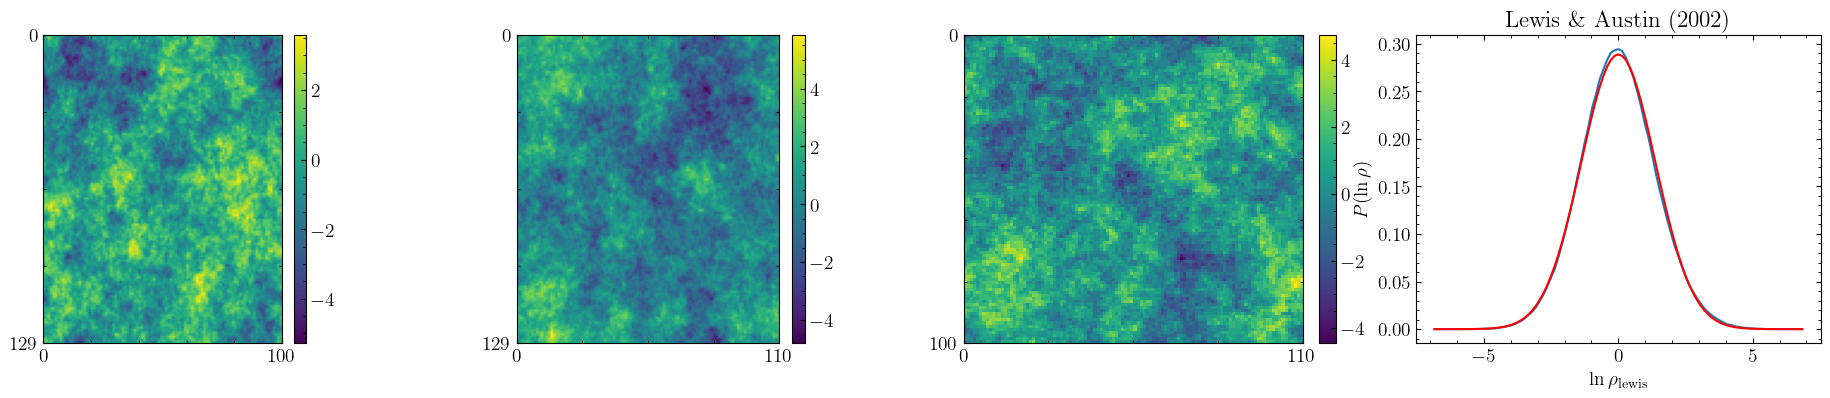

In [3]:
# Plot Density Field obtained using method = 2 (default method, Lewis & Austin 2002).

fig, ax = plt.subplots(1,4, figsize=(24,4))
ln_data = np.log(a.data)
im0 = ax[0].imshow(ln_data[:,:,nz//2])
im1 = ax[1].imshow(ln_data[:,ny//2,:])
im2 = ax[2].imshow(ln_data[nx//2,:,:])
for i in range(3):
    ax[i].set_xticks(ax[i].get_xlim(), labels=np.ceil(ax[i].get_xlim()).astype(int))
    ax[i].set_yticks(ax[i].get_ylim(), labels=np.ceil(ax[i].get_ylim()).astype(int))

add_colorbar(im0)
add_colorbar(im1)
add_colorbar(im2)

bins = np.linspace(-5.0*sigma_g, 5.0*sigma_g, 100) + mean_g
x    = (bins[:-1]+bins[1:])/2.0
h,_  = np.histogram(ln_data, bins, density=True)
y    = 1./np.sqrt(2.*np.pi*sigma_g**2) * np.exp(-(x-mean_g)**2/(2*sigma_g**2))
ax[3].plot(x,h)
ax[3].plot(x,y,color='red')
ax[3].set_xlabel(r'$\ln\rho_{\rm lewis}$')
ax[3].set_ylabel(r'$P(\ln\rho)$')
ax[3].set_title(r'Lewis \& Austin (2002)')

Text(0.5, 1.0, 'Seon (2012)')

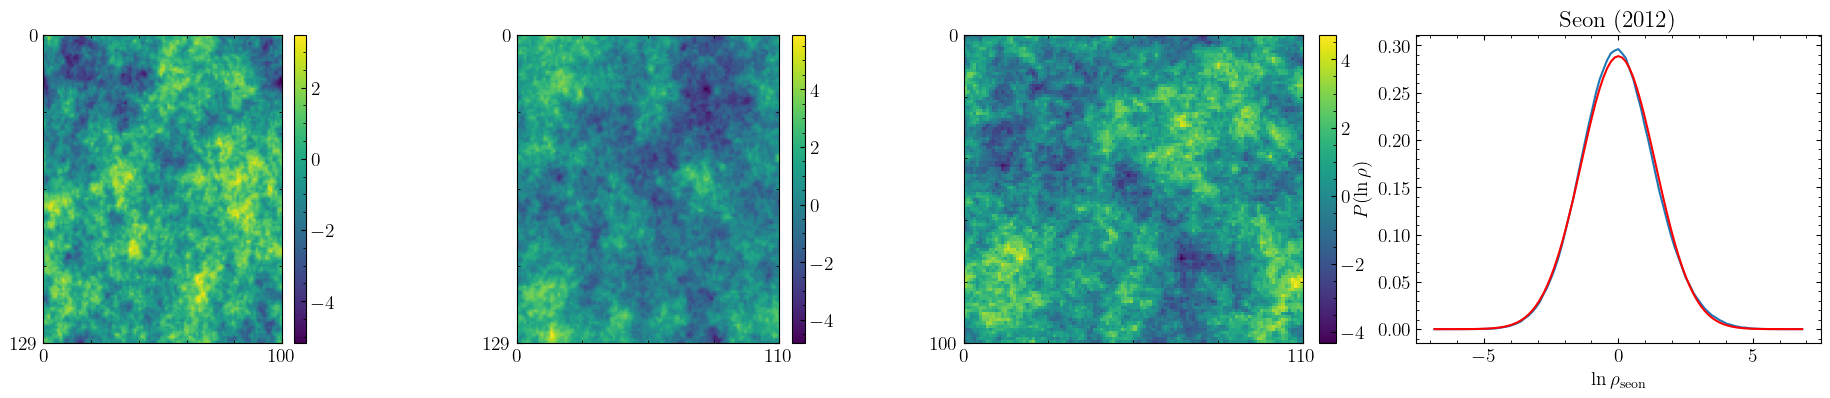

In [4]:
# Plot Density Field obtained using method = 1 (Seon 2012).

fig, ax = plt.subplots(1,4, figsize=(24,4))
ln_data = np.log(p.data)
im0 = ax[0].imshow(ln_data[:,:,nz//2])
im1 = ax[1].imshow(ln_data[:,ny//2,:])
im2 = ax[2].imshow(ln_data[nx//2,:,:])
for i in range(3):
    ax[i].set_xticks(ax[i].get_xlim(), labels=np.ceil(ax[i].get_xlim()).astype(int))
    ax[i].set_yticks(ax[i].get_ylim(), labels=np.ceil(ax[i].get_ylim()).astype(int))

add_colorbar(im0)
add_colorbar(im1)
add_colorbar(im2)

bins = np.linspace(-5.0*sigma_g, 5.0*sigma_g, 100) + mean_g
x    = (bins[:-1]+bins[1:])/2.0
h,_  = np.histogram(ln_data, bins, density=True)
y    = 1./np.sqrt(2.*np.pi*sigma_g**2) * np.exp(-(x-mean_g)**2/(2*sigma_g**2))
ax[3].plot(x,h)
ax[3].plot(x,y,color='red')
ax[3].set_xlabel(r'$\ln\rho_{\rm seon}$')
ax[3].set_ylabel(r'$P(\ln\rho)$')
ax[3].set_title(r'Seon (2012)')

iteration =   1 / convergence = 43.13 %
iteration =   2 / convergence = 74.54 %
iteration =   3 / convergence = 89.68 %
iteration =   4 / convergence = 96.43 %
iteration =   5 / convergence = 99.19 %
iteration =   6 / convergence = 99.59 %


Text(0.5, 1.0, 'Lewis \\& Austin (2012), $1.0 \\leq k \\leq 3.0$')

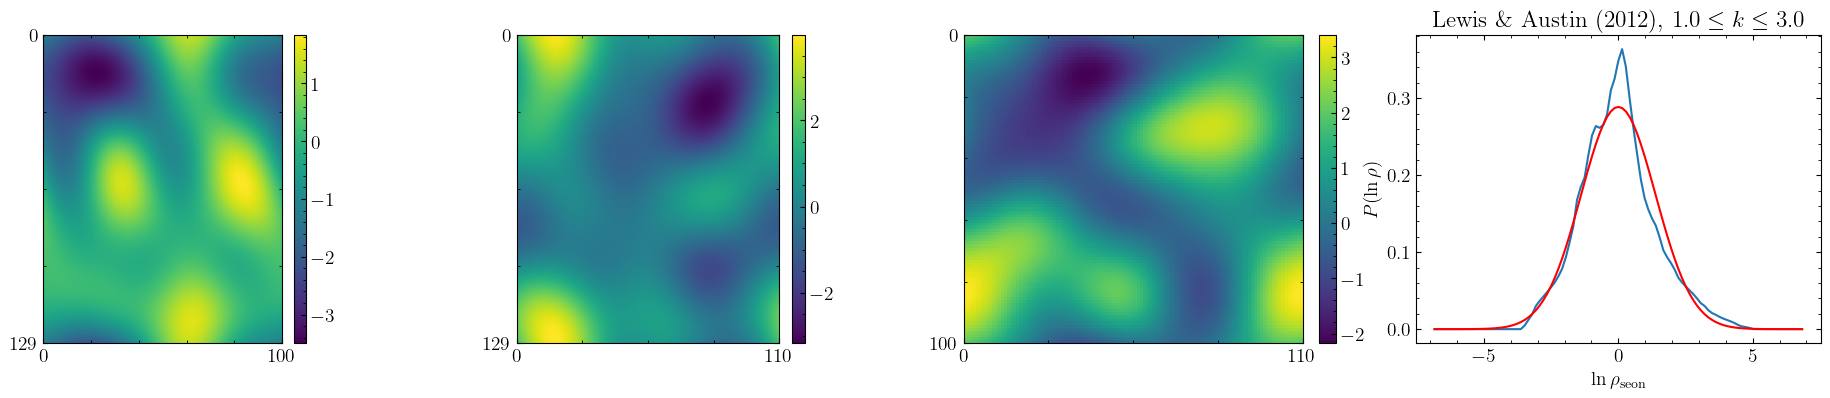

In [5]:
# Let's make a Random Field, which include only large scale fluctuations from the first example.

kmin = 1.0
kmax = 3.0
c = fbm3d_ISM(nx=nx,ny=ny,nz=nz,mach=mach, seed=seed, kmin=kmin, kmax=kmax, verbose=True)

fig, ax = plt.subplots(1,4, figsize=(24,4))
ln_data = np.log(c.data)
im0 = ax[0].imshow(ln_data[:,:,nz//2])
im1 = ax[1].imshow(ln_data[:,ny//2,:])
im2 = ax[2].imshow(ln_data[nx//2,:,:])
for i in range(3):
    ax[i].set_xticks(ax[i].get_xlim(), labels=np.ceil(ax[i].get_xlim()).astype(int))
    ax[i].set_yticks(ax[i].get_ylim(), labels=np.ceil(ax[i].get_ylim()).astype(int))

add_colorbar(im0)
add_colorbar(im1)
add_colorbar(im2)

bins = np.linspace(-5.0*sigma_g, 5.0*sigma_g, 100) + mean_g
x    = (bins[:-1]+bins[1:])/2.0
h,_  = np.histogram(ln_data, bins, density=True)
y    = 1./np.sqrt(2.*np.pi*sigma_g**2) * np.exp(-(x-mean_g)**2/(2*sigma_g**2))
ax[3].plot(x,h)
ax[3].plot(x,y,color='red')
ax[3].set_xlabel(r'$\ln\rho_{\rm seon}$')
ax[3].set_ylabel(r'$P(\ln\rho)$')
ax[3].set_title(r'Lewis \& Austin (2012), $%.1f \leq k \leq %.1f$' % (c.kmin, c.kmax))

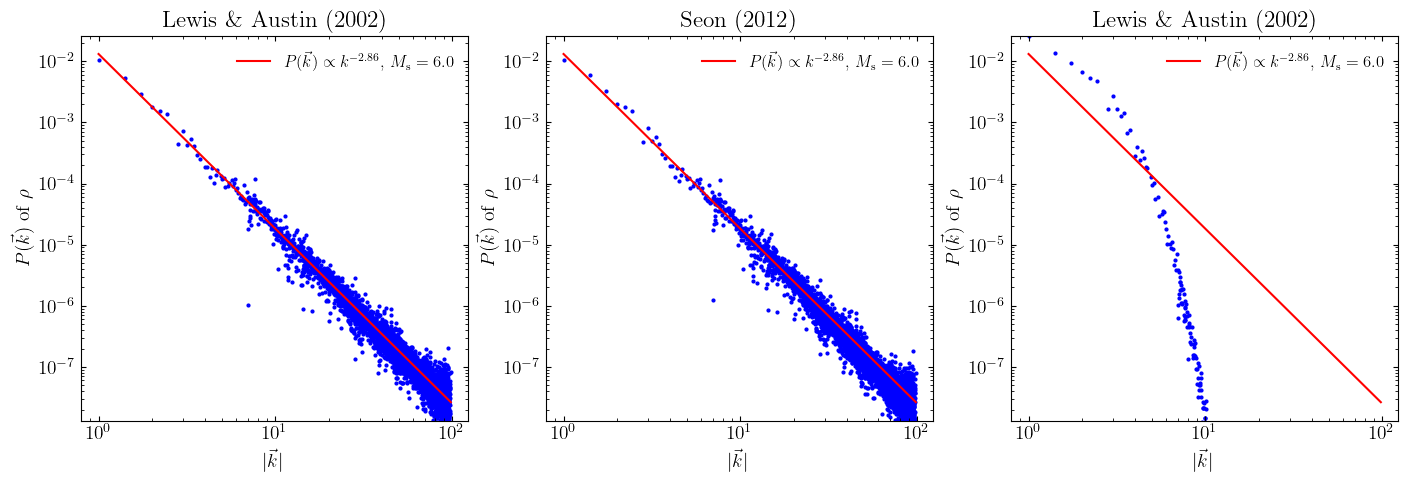

In [6]:
# Compare the power spectral densities obtained using method 2 and method 1.

kr_a, PSD_a = calculate_PSD(a.data)
kr_p, PSD_p = calculate_PSD(p.data)
kr_c, PSD_c = calculate_PSD(c.data)

ynorm = calculate_PSD_norm(a.data.shape, a.slope_ln)
y = kr_a**(-a.slope_ln)*ynorm
y[0] = 0.0

fig, axs = plt.subplots(1,3, figsize=(17,5))
lab = r'$P(\vec{k}) \propto k^{-%.2f}$, $M_{\rm s}=%.1f$' % (a.slope_ln, a.mach)

ax = axs[0]
ax.plot(kr_a[1:], y[1:], color='red', label=lab)
ax.scatter(kr_a[1:], PSD_a[1:],s=4.0, color='blue')
ax.set_title(r'Lewis \& Austin (2002)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$|\vec{k}|$')
ax.set_ylabel(r'$P(\vec{k})$ of $\rho$')
ax.set_ylim(np.amin(y[1:])*0.5, np.amax(y[1:])*2)
ax.legend(frameon=False)

ax = axs[1]
ax.plot(kr_p[1:], y[1:], color='red', label=lab)
ax.scatter(kr_p[1:], PSD_p[1:],s=4.0, color='blue')
ax.set_title(r'Seon (2012)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$|\vec{k}|$')
ax.set_ylabel(r'$P(\vec{k})$ of $\rho$')
ax.set_ylim(np.amin(y[1:])*0.5, np.amax(y[1:])*2)
ax.legend(frameon=False)

ax = axs[2]
ax.plot(kr_c[1:], y[1:], color='red', label=lab)
ax.scatter(kr_c[1:], PSD_c[1:],s=4.0, color='blue')
ax.set_title(r'Lewis \& Austin (2002)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$|\vec{k}|$')
ax.set_ylabel(r'$P(\vec{k})$ of $\rho$')
ax.set_ylim(np.amin(y[1:])*0.5, np.amax(y[1:])*2)
ax.legend(frameon=False)

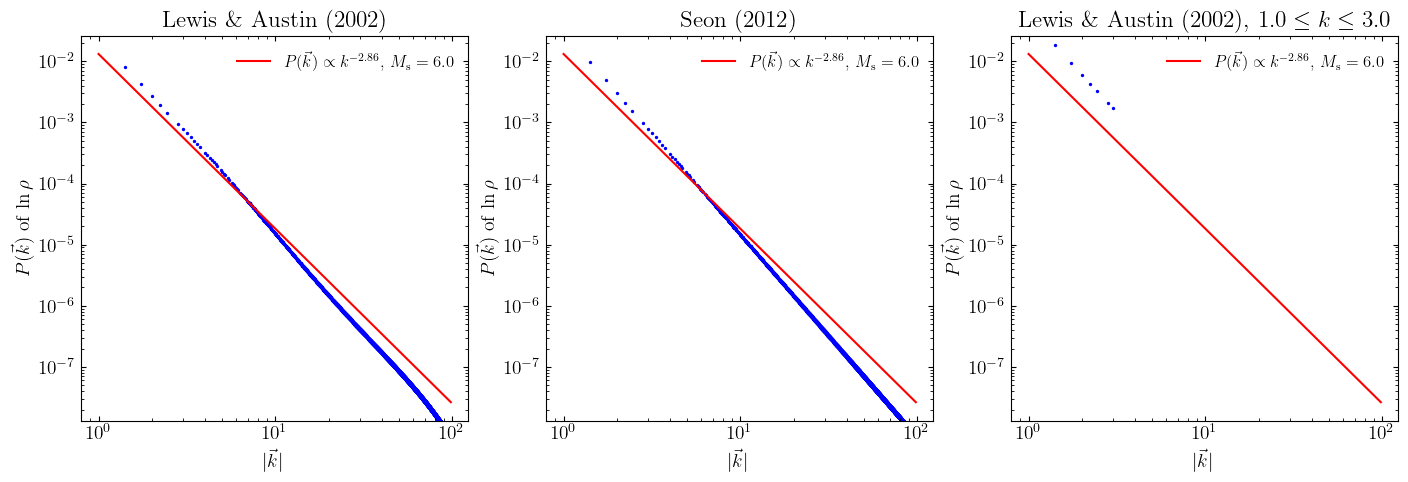

In [7]:
# Compare the Power Spectral Densities of log(density) obtained using method = 2 and method = 1

b = np.log(a.data)
q = np.log(p.data)
m = np.log(c.data)

kr_b, PSD_b = calculate_PSD(b)
kr_q, PSD_q = calculate_PSD(q)
kr_m, PSD_m = calculate_PSD(m)

ynorm = calculate_PSD_norm(a.data.shape, a.slope_ln)
y = kr_b**(-a.slope_ln) * ynorm

fig, axs = plt.subplots(1,3, figsize=(17,5))
lab = r'$P(\vec{k}) \propto k^{-%.2f}$, $M_{\rm s}=%.1f$' % (a.slope_ln, a.mach)

ax = axs[0]
ax.plot(kr_b[1:], y[1:], color='red', label=lab)
ax.scatter(kr_b[1:], PSD_b[1:], s=2.0, color='blue')
ax.set_title(r'Lewis \& Austin (2002)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$|\vec{k}|$')
ax.set_ylabel(r'$P(\vec{k})$ of $\ln\rho$')
ax.set_ylim(np.amin(y[1:])*0.5, np.amax(y[1:])*2)
ax.legend(frameon=False)

ax = axs[1]
ax.plot(kr_q[1:], y[1:], color='red', label=lab)
ax.scatter(kr_q[1:], PSD_q[1:], s=2.0, color='blue')
ax.set_title(r'Seon (2012)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$|\vec{k}|$')
ax.set_ylabel(r'$P(\vec{k})$ of $\ln\rho$')
ax.set_ylim(np.amin(y[1:])*0.5, np.amax(y[1:])*2)
ax.legend(frameon=False)

ax = axs[2]
ax.plot(kr_m[1:], y[1:], color='red', label=lab)
ax.scatter(kr_m[1:], PSD_m[1:], s=2.0, color='blue')
ax.set_title(r'Lewis \& Austin (2002), $%.1f \leq k \leq %.1f$' % (c.kmin, c.kmax))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$|\vec{k}|$')
ax.set_ylabel(r'$P(\vec{k})$ of $\ln\rho$')
ax.set_ylim(np.amin(y[1:])*0.5, np.amax(y[1:])*2)
ax.legend(frameon=False)

(129, 100, 110) (129, 100, 110)


Text(0, 0.5, '$\\rho$ (lewis) $1.0 \\leq k \\leq 3.0$')

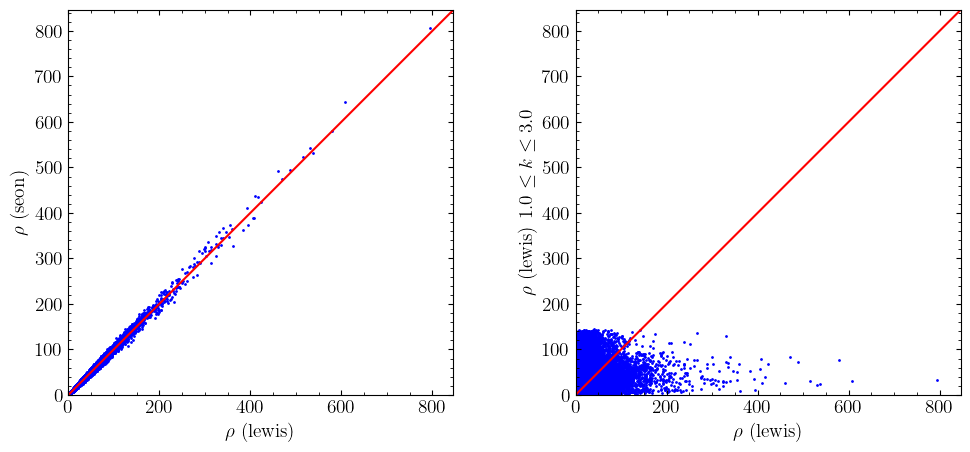

In [8]:
# Compare Densities obtained using method = 2 and method = 1

xmax = np.amax([a.data.max(), p.data.max()]) * 1.05
print(a.data.shape, p.data.shape)

fig, axs = plt.subplots(1,2, figsize=(12,5))

ax = axs[0]
ax.plot([0,xmax],[0,xmax], color='red')
ax.scatter(a.data, p.data, marker='o', s=1.0, color='blue')
ax.set_xlim(0.0, xmax)
ax.set_ylim(0.0, xmax)
ax.set_aspect('equal', 'box')
ax.set_xlabel(r'$\rho$ (lewis)')
ax.set_ylabel(r'$\rho$ (seon)')

ax = axs[1]
ax.plot([0,xmax],[0,xmax], color='red')
ax.scatter(a.data, c.data, marker='o', s=1.0, color='blue')
ax.set_xlim(0.0, xmax)
ax.set_ylim(0.0, xmax)
ax.set_aspect('equal', 'box')
ax.set_xlabel(r'$\rho$ (lewis)')
ax.set_ylabel(r'$\rho$ (lewis) $%.1f \leq k \leq %.1f$' % (c.kmin, c.kmax))

In [9]:
# Write a fits file
# Later, a function to save a HDF5 file will be added.

a.writeto('M%03d_%03d.fits.gz' % (a.mach*10.0, a.data.shape[0]))

a FITS file saved:  M060_129.fits.gz


iteration =   1 / convergence = 43.13 %
iteration =   2 / convergence = 74.54 %
iteration =   3 / convergence = 89.68 %
iteration =   4 / convergence = 96.43 %
iteration =   5 / convergence = 99.19 %
iteration =   6 / convergence = 99.59 %


Text(0.5, 1.0, 'Lewis \\& Austin (2002), Centered at min')

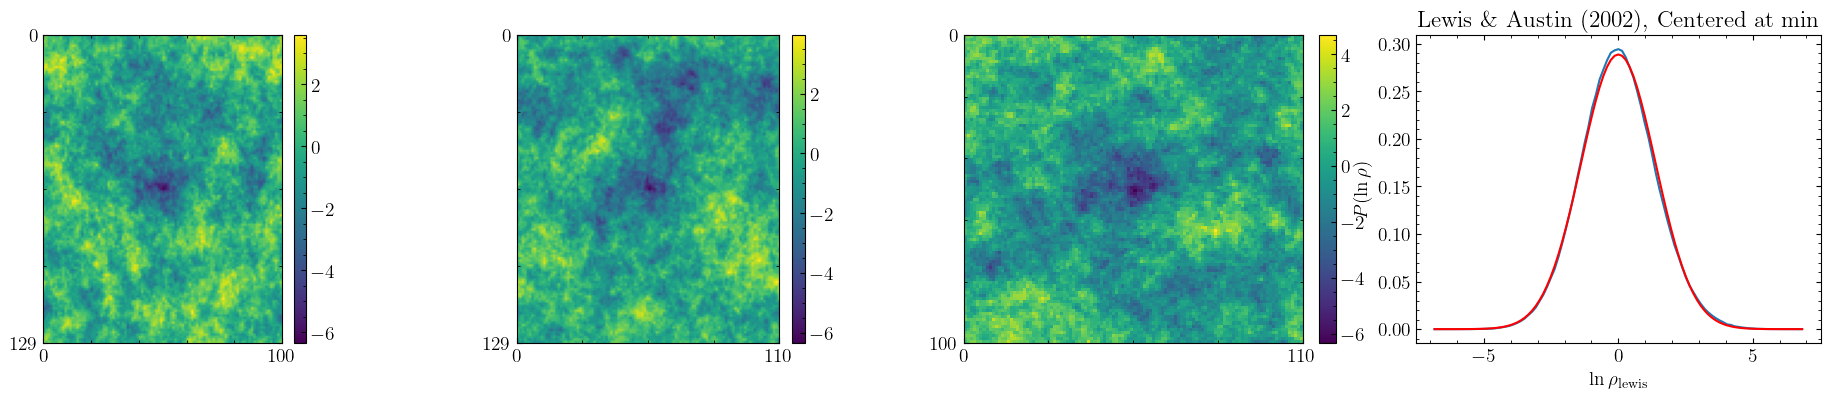

In [10]:
centering = 'min'
c = fbm3d_ISM(nx=nx,ny=ny,nz=nz,seed=seed,mach=mach,verbose=True, centering=centering)

# Instead of re-generating the data using the centering option,
#      you can center the data cube at the minimum location as follows:
#
#c = a.copy()  
#c.centering('min')
#
# In the above, copy() performs a deep-copy.
# It is important to note that without a deep copy, the original data would be modified.

fig, ax = plt.subplots(1,4, figsize=(24,4))
ln_data = np.log(c.data)
im0 = ax[0].imshow(ln_data[:,:,nz//2])
im1 = ax[1].imshow(ln_data[:,ny//2,:])
im2 = ax[2].imshow(ln_data[nx//2,:,:])
for i in range(3):
    ax[i].set_xticks(ax[i].get_xlim(), labels=np.ceil(ax[i].get_xlim()).astype(int))
    ax[i].set_yticks(ax[i].get_ylim(), labels=np.ceil(ax[i].get_ylim()).astype(int))

add_colorbar(im0)
add_colorbar(im1)
add_colorbar(im2)

bins = np.linspace(-5.0*sigma_g, 5.0*sigma_g, 100) + mean_g
x    = (bins[:-1]+bins[1:])/2.0
h,_  = np.histogram(ln_data, bins, density=True)
y    = 1./np.sqrt(2.*np.pi*sigma_g**2) * np.exp(-(x-mean_g)**2/(2*sigma_g**2))
ax[3].plot(x,h)
ax[3].plot(x,y,color='red')
ax[3].set_xlabel(r'$\ln\rho_{\rm lewis}$')
ax[3].set_ylabel(r'$P(\ln\rho)$')
ax[3].set_title(r'Lewis \& Austin (2002), Centered at %s' % centering)

iteration =   1 / convergence = 43.13 %
iteration =   2 / convergence = 74.54 %
iteration =   3 / convergence = 89.68 %
iteration =   4 / convergence = 96.43 %
iteration =   5 / convergence = 99.19 %
iteration =   6 / convergence = 99.59 %


Text(0.5, 1.0, 'Lewis \\& Austin (2002), Centered at max')

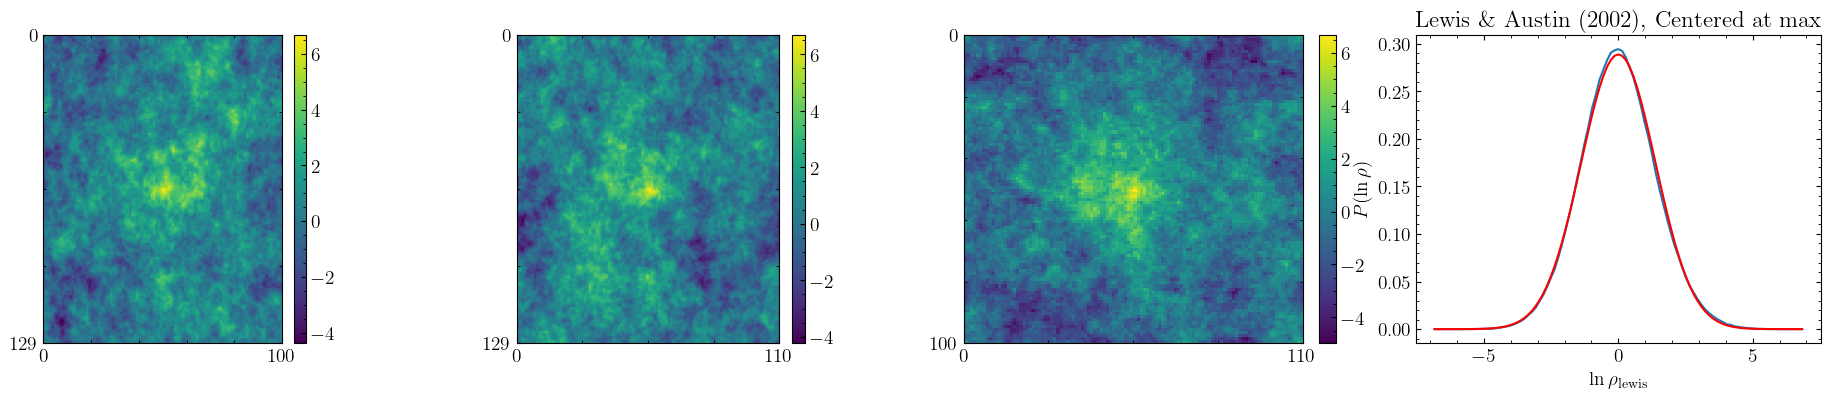

In [11]:
centering = 'max'
c = fbm3d_ISM(nx=nx,ny=ny,nz=nz,seed=seed,mach=mach,verbose=True, centering=centering)

# Instead of re-generating the data using the centering option,
#      you can center the data cube at the minimum location as follows:
#
#c = a.copy()  
#c.centering('min')
#
# In the above, copy() performs a deep-copy.
# It is important to note that without a deep copy, the original data would be modified.

fig, ax = plt.subplots(1,4, figsize=(24,4))
ln_data = np.log(c.data)
im0 = ax[0].imshow(ln_data[:,:,nz//2])
im1 = ax[1].imshow(ln_data[:,ny//2,:])
im2 = ax[2].imshow(ln_data[nx//2,:,:])
for i in range(3):
    ax[i].set_xticks(ax[i].get_xlim(), labels=np.ceil(ax[i].get_xlim()).astype(int))
    ax[i].set_yticks(ax[i].get_ylim(), labels=np.ceil(ax[i].get_ylim()).astype(int))

add_colorbar(im0)
add_colorbar(im1)
add_colorbar(im2)

bins = np.linspace(-5.0*sigma_g, 5.0*sigma_g, 100) + mean_g
x    = (bins[:-1]+bins[1:])/2.0
h,_  = np.histogram(ln_data, bins, density=True)
y    = 1./np.sqrt(2.*np.pi*sigma_g**2) * np.exp(-(x-mean_g)**2/(2*sigma_g**2))
ax[3].plot(x,h)
ax[3].plot(x,y,color='red')
ax[3].set_xlabel(r'$\ln\rho_{\rm lewis}$')
ax[3].set_ylabel(r'$P(\ln\rho)$')
ax[3].set_title(r'Lewis \& Austin (2002), Centered at %s' % centering)